In [74]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import random

In [2]:
X,y=make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df=pd.DataFrame(X,columns=['cols1','cols2','cols3','cols4','cols5'])

In [5]:
df['target']=y

In [7]:
df.shape

(100, 6)

In [8]:
df.head()

,cols1,cols2,cols3,cols4,cols5,target
0,-1.538600,2.361644,0.195907,2.232375,-3.296418,0
1,-0.088222,-2.778419,-0.184841,-0.584108,1.275024,1
2,-1.260876,0.378273,2.125510,0.932831,-3.195210,0
3,0.282706,-1.058338,0.927526,0.855026,1.303054,1
4,3.468419,-2.822151,2.190177,0.721074,1.377114,1


In [19]:
# function for row sampling
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)
    

In [72]:

# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df
     

In [98]:
# function for combined sampling
def combined_sampling(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)
    

# For sample Rows

In [54]:
df1=sample_rows(df,0.2)

In [55]:
df2=sample_rows(df,0.2)

In [56]:
df3=sample_rows(df,0.2)

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()


In [59]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [60]:
from sklearn.tree import plot_tree

[Text(0.6, 0.8333333333333334, 'x[1] <= -0.348\ngini = 0.455\nsamples = 20\nvalue = [13, 7]'),
 Text(0.4, 0.5, 'x[4] <= 2.462\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

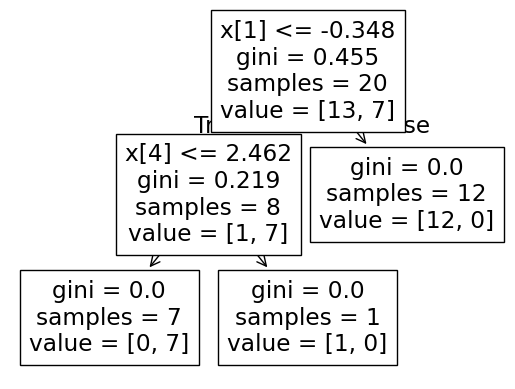

In [61]:
plot_tree(clf1)

[Text(0.4, 0.8333333333333334, 'x[4] <= -0.311\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= -1.603\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]')]

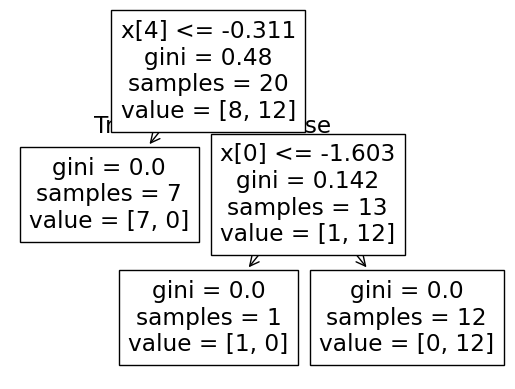

In [62]:
plot_tree(clf2)

[Text(0.5, 0.8333333333333334, 'x[0] <= -0.033\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.25, 0.5, 'x[1] <= -1.55\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.75, 0.5, 'x[2] <= -1.009\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]')]

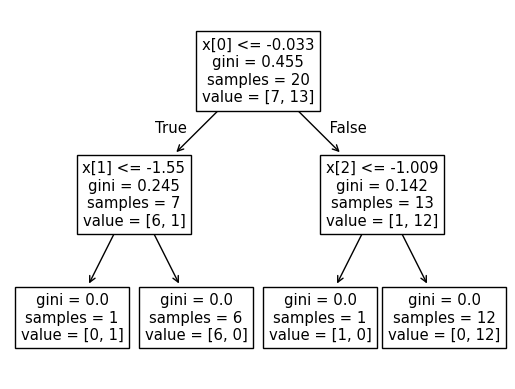

In [53]:
plot_tree(clf3)

In [64]:
clf1.predict(np.array([-1.538600	,2.361644,	0.195907,	2.232375	,-3.296418	]).reshape(1,5))

C:\Users\avani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [65]:
clf2.predict(np.array([-1.538600	,2.361644,	0.195907,	2.232375	,-3.296418	]).reshape(1,5))

C:\Users\avani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [66]:
clf3.predict(np.array([-1.538600	,2.361644,	0.195907,	2.232375	,-3.296418	]).reshape(1,5))

C:\Users\avani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

# For Sample Columns

In [79]:
df1=sample_features(df,0.8)

C:\Users\avani\AppData\Local\Temp\ipykernel_15404\1527580876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [80]:
df2=sample_features(df,0.8)

C:\Users\avani\AppData\Local\Temp\ipykernel_15404\1527580876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [81]:
df3=sample_features(df,0.8)

C:\Users\avani\AppData\Local\Temp\ipykernel_15404\1527580876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [88]:
df1

,cols4,cols5,cols3,cols1,target
0,2.232375,-3.296418,0.195907,-1.538600,0
1,-0.584108,1.275024,-0.184841,-0.088222,1
2,0.932831,-3.195210,2.125510,-1.260876,0
3,0.855026,1.303054,0.927526,0.282706,1
4,0.721074,1.377114,2.190177,3.468419,1
...,...,...,...,...,...
95,2.637164,-1.724441,1.767624,-4.174462,0
96,0.321348,0.865713,0.873188,0.607623,1
97,5.837302,-0.112743,4.336767,0.505447,1
98,0.001438,-3.051704,0.173806,0.823028,0


In [82]:

from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [84]:

clf1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:4],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:4],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.32, 0.9375, 'x[1] <= -0.464\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.16, 0.8125, 'x[1] <= -0.551\ngini = 0.048\nsamples = 41\nvalue = [40, 1]'),
 Text(0.24, 0.875, 'True  '),
 Text(0.08, 0.6875, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.24, 0.6875, 'x[1] <= -0.524\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.16, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.32, 0.5625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.48, 0.8125, 'x[3] <= -1.603\ngini = 0.282\nsamples = 59\nvalue = [10, 49]'),
 Text(0.4, 0.875, '  False'),
 Text(0.4, 0.6875, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.56, 0.6875, 'x[1] <= 3.071\ngini = 0.168\nsamples = 54\nvalue = [5, 49]'),
 Text(0.48, 0.5625, 'x[2] <= -1.115\ngini = 0.14\nsamples = 53\nvalue = [4, 49]'),
 Text(0.28, 0.4375, 'x[3] <= 1.441\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.36, 0.3125, 'gini = 0.0\nsamples

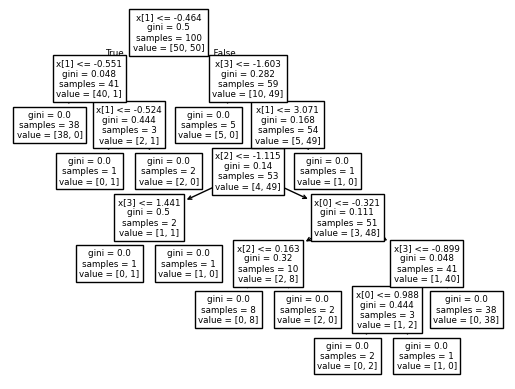

In [85]:
plot_tree(clf1)

[Text(0.4230769230769231, 0.9375, 'x[3] <= -0.464\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.15384615384615385, 0.8125, 'x[3] <= -0.551\ngini = 0.048\nsamples = 41\nvalue = [40, 1]'),
 Text(0.28846153846153844, 0.875, 'True  '),
 Text(0.07692307692307693, 0.6875, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.23076923076923078, 0.6875, 'x[1] <= 0.675\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.15384615384615385, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3076923076923077, 0.5625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6923076923076923, 0.8125, 'x[1] <= 1.051\ngini = 0.282\nsamples = 59\nvalue = [10, 49]'),
 Text(0.5576923076923077, 0.875, '  False'),
 Text(0.5384615384615384, 0.6875, 'x[3] <= 2.462\ngini = 0.171\nsamples = 53\nvalue = [5, 48]'),
 Text(0.46153846153846156, 0.5625, 'x[2] <= 2.561\ngini = 0.111\nsamples = 51\nvalue = [3, 48]'),
 Text(0.3076923076923077, 0.4375, 'x[0] <= 0.423\ngini = 0.08\nsamples = 48\nvalue = [

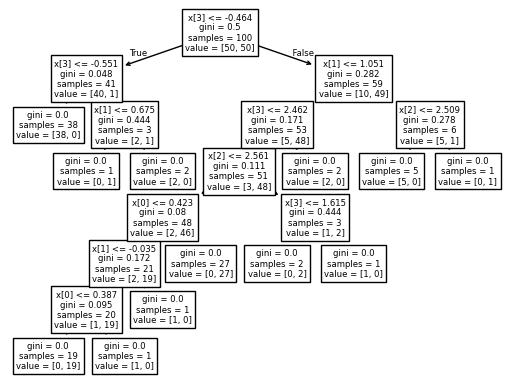

In [86]:
plot_tree(clf2)

[Text(0.375, 0.9285714285714286, 'x[0] <= -0.464\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.16666666666666666, 0.7857142857142857, 'x[0] <= -0.551\ngini = 0.048\nsamples = 41\nvalue = [40, 1]'),
 Text(0.2708333333333333, 0.8571428571428572, 'True  '),
 Text(0.08333333333333333, 0.6428571428571429, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.25, 0.6428571428571429, 'x[3] <= 1.759\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5833333333333334, 0.7857142857142857, 'x[2] <= -1.603\ngini = 0.282\nsamples = 59\nvalue = [10, 49]'),
 Text(0.4791666666666667, 0.8571428571428572, '  False'),
 Text(0.5, 0.6428571428571429, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6666666666666666, 0.6428571428571429, 'x[1] <= 1.051\ngini = 0.168\nsamples = 54\nvalue = [5, 49]'),
 Text(0.5, 0.5, 'x[0] <= 3.071\ngini = 0.077\

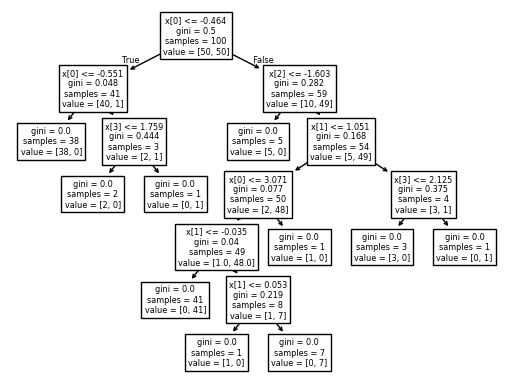

In [87]:
plot_tree(clf3)

In [90]:
clf1.predict(np.array([-0.584108,	1.275024,	-0.184841,	-0.088222]).reshape(1,4))

C:\Users\avani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [91]:
clf2.predict(np.array([-0.584108,	1.275024,	-0.184841,	-0.088222]).reshape(1,4))

C:\Users\avani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [92]:
clf3.predict(np.array([-0.584108,	1.275024,	-0.184841,	-0.088222]).reshape(1,4))

C:\Users\avani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

# Now with combime sampling

In [99]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\avani\AppData\Local\Temp\ipykernel_15404\1527580876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [100]:
df2 = combined_sampling(df,0.5,0.5)


C:\Users\avani\AppData\Local\Temp\ipykernel_15404\1527580876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [101]:
df3 = combined_sampling(df,0.5,0.5)


C:\Users\avani\AppData\Local\Temp\ipykernel_15404\1527580876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [102]:

print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['cols1', 'cols2', 'target'], dtype='object')
Index(['cols2', 'cols5', 'target'], dtype='object')
Index(['cols2', 'cols1', 'target'], dtype='object')


In [103]:
df3


,cols2,cols1,target
18,2.397439,-1.859246,0
52,1.821338,1.978715,0
89,-0.745863,0.883379,1
72,1.211476,-2.032534,0
96,-0.640038,0.607623,1
88,-2.617380,2.936167,1
23,1.615117,-0.006293,0
37,-1.513790,0.172010,1
30,-1.703693,4.986616,1
61,-1.141901,2.549547,1


In [104]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [105]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [107]:

from sklearn.tree import plot_tree

[Text(0.4444444444444444, 0.9285714285714286, 'x[1] <= -0.035\ngini = 0.487\nsamples = 50\nvalue = [29.0, 21.0]'),
 Text(0.2222222222222222, 0.7857142857142857, 'x[0] <= -1.511\ngini = 0.32\nsamples = 20\nvalue = [4, 16]'),
 Text(0.3333333333333333, 0.8571428571428572, 'True  '),
 Text(0.1111111111111111, 0.6428571428571429, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.3333333333333333, 0.6428571428571429, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.6666666666666666, 0.7857142857142857, 'x[1] <= 1.267\ngini = 0.278\nsamples = 30\nvalue = [25, 5]'),
 Text(0.5555555555555556, 0.8571428571428572, '  False'),
 Text(0.5555555555555556, 0.6428571428571429, 'x[1] <= 0.668\ngini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(0.3333333333333333, 0.5, 'x[1] <= 0.292\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.2222222222222222, 0.35714285714285715, 'x[1] <= 0.047\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.1111111111111111, 0.21428571428571427, 'gini = 0.0\n

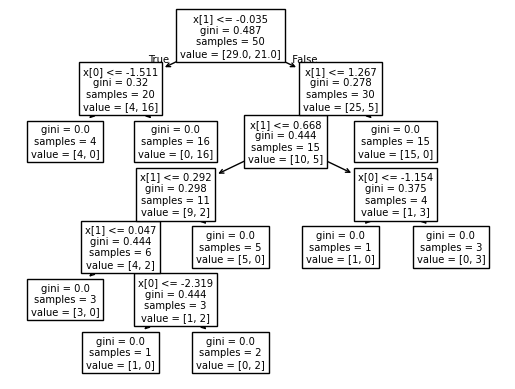

In [108]:

plot_tree(clf1)

[Text(0.6666666666666666, 0.9375, 'x[1] <= -0.311\ngini = 0.435\nsamples = 50\nvalue = [34, 16]'),
 Text(0.5555555555555556, 0.8125, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.6111111111111112, 0.875, 'True  '),
 Text(0.7777777777777778, 0.8125, 'x[0] <= 1.582\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.7222222222222222, 0.875, '  False'),
 Text(0.6666666666666666, 0.6875, 'x[1] <= 2.367\ngini = 0.363\nsamples = 21\nvalue = [5, 16]'),
 Text(0.5555555555555556, 0.5625, 'x[1] <= 1.248\ngini = 0.198\nsamples = 18\nvalue = [2, 16]'),
 Text(0.4444444444444444, 0.4375, 'x[1] <= 1.16\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.3333333333333333, 0.3125, 'x[0] <= -0.811\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.2222222222222222, 0.1875, 'x[1] <= 1.035\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 T

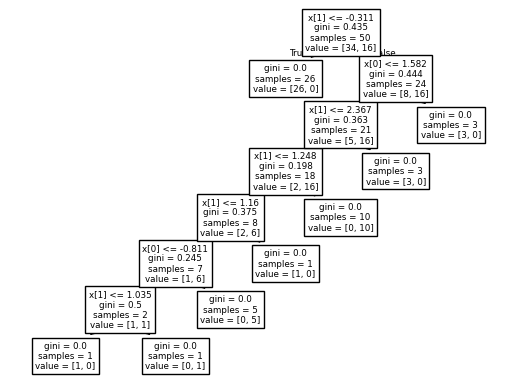

In [109]:
plot_tree(clf2)


[Text(0.6, 0.9, 'x[0] <= 0.295\ngini = 0.493\nsamples = 50\nvalue = [28.0, 22.0]'),
 Text(0.4, 0.7, 'x[1] <= -2.566\ngini = 0.302\nsamples = 27\nvalue = [5, 22]'),
 Text(0.5, 0.8, 'True  '),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.5, 'x[1] <= -1.118\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.4, 0.3, 'x[0] <= -0.312\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.8, 0.7, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.7, 0.8, '  False')]

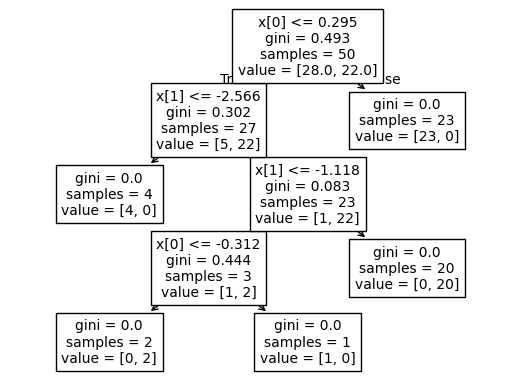

In [110]:
plot_tree(clf3)

In [111]:
clf1.predict(np.array([2.397439	,-1.859246	]).reshape(1,2))

C:\Users\avani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [112]:
clf2.predict(np.array([2.397439	,-1.859246	]).reshape(1,2))

C:\Users\avani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [113]:
clf3.predict(np.array([2.397439	,-1.859246	]).reshape(1,2))

C:\Users\avani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])